In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [11]:
irisDataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    irisDataset['data'],irisDataset['target'],random_state=0
)

In [12]:
irisDataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    irisDataset['data'],irisDataset['target'],random_state=0
)

param_grid = {
    'hidden_layer_sizes': [(10,),(20,),(40,), (80,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=4)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_mlp = grid_search.best_estimator_
test_accuracy = best_mlp.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling', 'solver': 'adam'}
Best score: 0.9821428571428572
Test accuracy: 0.9736842105263158


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


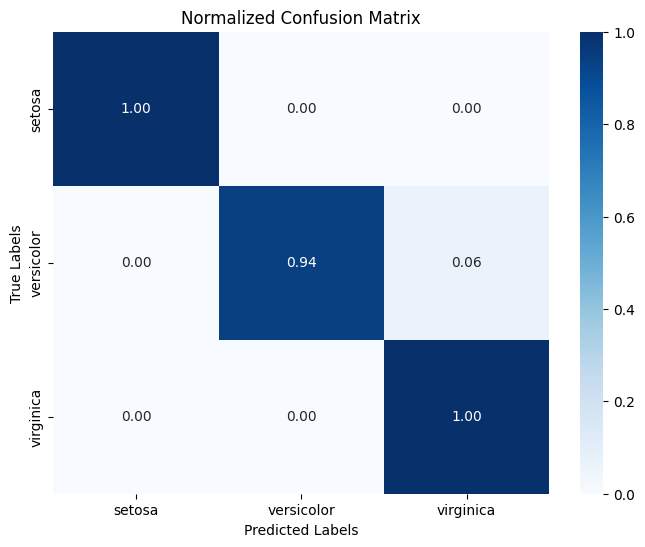

In [19]:
y_pred = best_mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=irisDataset.target_names, yticklabels=irisDataset.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix")
plt.show()

In [26]:
sensitivity = {}
for i in range(len(irisDataset.target_names)):
  sensitivity[irisDataset.target_names[i]] = cm[i, i] / np.sum(cm[i, :])

print("Sensitivity for each class:")
for class_name, sens in sensitivity.items():
  print(f"{class_name}: {sens:.4f}")

Sensitivity for each class:
setosa: 1.0000
versicolor: 0.9375
virginica: 1.0000


In [25]:
specificity = {}
for i in range(len(irisDataset.target_names)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    specificity[irisDataset.target_names[i]] = TN / (np.sum(cm) - np.sum(cm[i, :]))

print("\nSpecificity for each class:")
for class_name, spec in specificity.items():
    print(f"{class_name}: {spec:.4f}")


Specificity for each class:
setosa: 1.0000
versicolor: 1.0000
virginica: 0.9655


In [22]:
import numpy as np

VP = np.diag(cm)
VN = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + VP
N = np.sum(cm)

accuracy = np.sum(VP) / N
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9737


In [27]:
FP = np.sum(cm, axis=0) - VP

precision = VP / (VP + FP)

print("Precision for each class:")
for i, class_name in enumerate(irisDataset.target_names):
    print(f"{class_name}: {precision[i]:.4f}")

Precision for each class:
setosa: 1.0000
versicolor: 1.0000
virginica: 0.9000


In [28]:
sensitivity_values = np.array(list(sensitivity.values()))
F_score = 2 * (precision * sensitivity_values) / (precision + sensitivity_values)

print("F-score for each class:")
for i, class_name in enumerate(irisDataset.target_names):
    print(f"{class_name}: {F_score[i]:.4f}")

F-score for each class:
setosa: 1.0000
versicolor: 0.9677
virginica: 0.9474
